In [6]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms

In [2]:
import torch 
torch.cuda.is_available()

True

In [7]:
def add_black_border_to_square(image):
    # 獲取原始照片的尺寸
    height, width = image.shape[:2]

    # 計算新照片的邊長（取原始照片的較長邊）
    new_size = max(height, width)
    
    # 判斷是否為灰階圖像
    if len(image.shape) == 2:
        # 創建一個黑色的背景圖像
        new_image = np.zeros((new_size, new_size), dtype=np.uint8)
    
    elif image.shape[2] == 1:
        channels = 3
        # 創建一個黑色的背景圖像
        new_image = np.zeros((new_size, new_size, channels), dtype=np.uint8)
    else:
        channels = 3
        # 創建一個黑色的背景圖像
        new_image = np.zeros((new_size, new_size, channels), dtype=np.uint8)


    # 計算原始照片在新照片中的起始位置
    y_offset = (new_size - height) // 2
    x_offset = (new_size - width) // 2

    # 將原始照片粘貼到黑色背景圖像的中央
    new_image[y_offset:y_offset + height, x_offset:x_offset + width] = image
    
    return new_image

In [8]:
def add_black_border_to_square_PIL(image):
    """
    將輸入圖像補上黑邊，使其變成正方形
    :param image: PIL.Image 圖像對象
    :return: 補黑邊後的正方形圖像
    """
    # 獲取原始照片的尺寸
    width, height = image.size
    
    # 計算新照片的邊長（取原始照片的較長邊）
    new_size = max(width, height)
    
    # 創建一個黑色的背景圖像
    new_image = Image.new("RGB", (new_size, new_size), (0, 0, 0))

    # 計算原始照片在新照片中的起始位置
    x_offset = (new_size - width) // 2
    y_offset = (new_size - height) // 2

    # 將原始照片粘貼到黑色背景圖像的中央
    new_image.paste(image, (x_offset, y_offset))

    return new_image




In [10]:
def cv2_to_pil(cv2_image):
    """
    將 OpenCV 圖像轉換為 PIL 圖像
    :param cv2_image: 使用 OpenCV (cv2) 讀取或處理的 numpy 圖像
    :return: PIL.Image 圖像對象
    """
    # 檢查圖像是否為灰階
    if len(cv2_image.shape) == 2:
        # 灰階圖像直接轉換
        pil_image = Image.fromarray(cv2_image)
    else:
        # 彩色圖像需要轉換顏色通道順序 (從 BGR 轉為 RGB)
        cv2_image_rgb = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)
        pil_image = Image.fromarray(cv2_image_rgb)
    
    return pil_image

In [16]:
def get_tensor(image, size=256):
    # 定義變換管道
    transform = transforms.Compose([
        transforms.Lambda(add_black_border_to_square_PIL),
        transforms.Grayscale(1),
        transforms.Resize((size, size)),
        # transforms.ToTensor(),
        # transforms.Normalize(mean=[0.5], std=[0.5]),
        # transforms.Lambda(lambda x: x.unsqueeze(0)),
    ])
    return transform(image)

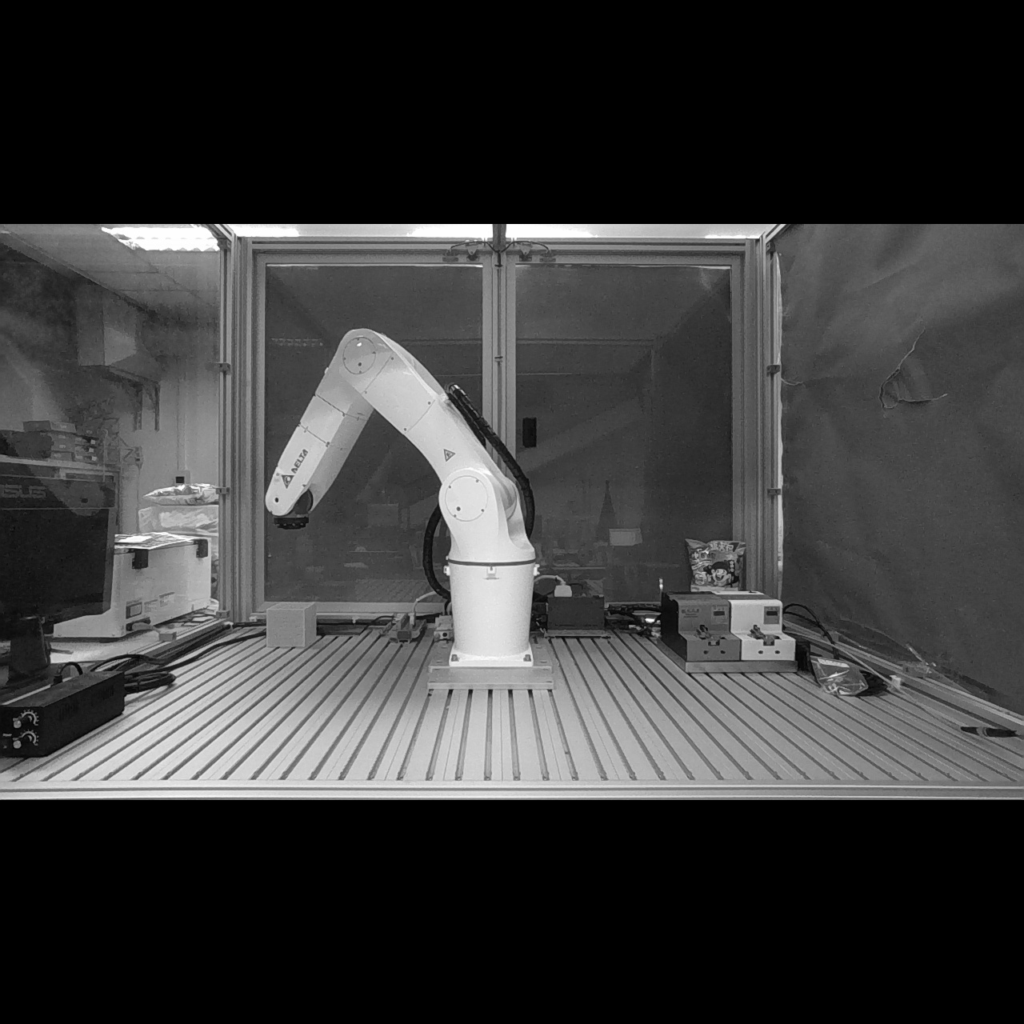

In [22]:
dirr = "/home/yen/mount/nas/111/111033631_Yen/ARM/capture_images_real/Jun17_H15_M21_S56_010_010_010_shuffle_False_502_36_001/img_0002.jpg"
image = cv2.imread(dirr, 0)

image = cv2_to_pil(image)

image = get_tensor(image, 1024)

image
